In [0]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [0]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

# Aplicación de Algoritmos (Data Cruda)

In [0]:
from sklearn.model_selection import train_test_split

#Partición de la data cruda
X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

## 1° Algorithm Test: Random Forest

0.02201774564574433


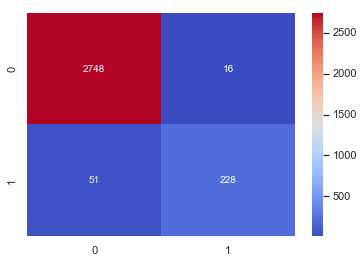

In [0]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model.fit(X_train, y_train)
RF_y_pred = RF_model.predict(X_val)

from sklearn.metrics import mean_squared_error
RF_MSE =mean_squared_error(y_val, RF_y_pred)  
print(RF_MSE)

from sklearn.metrics import confusion_matrix
RF_conf = confusion_matrix(y_val, RF_y_pred)

sns.heatmap(RF_conf,annot=True, fmt="d", cmap="coolwarm");

In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, RF_y_pred)
accuracy

0.9779822543542557

In [0]:
from sklearn.metrics import precision_score
precision = precision_score(y_val, RF_y_pred)
precision

0.9344262295081968

In [0]:
from sklearn.metrics import recall_score
recall = recall_score(y_val, RF_y_pred)
recall

0.8172043010752689

In [0]:
from sklearn.metrics import f1_score
f1score = f1_score(y_val, RF_y_pred)
f1score

0.8718929254302105

## 2° Algorithm Test: SVM

0.09069996713769307


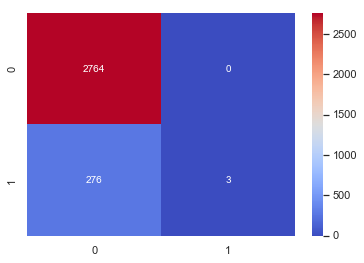

In [0]:
from sklearn.svm import SVC

SVM_model = SVC(gamma='auto',kernel='rbf')
SVM_model.fit(X_train, y_train) 
SVM_y_pred = SVM_model.predict(X_val)

from sklearn.metrics import mean_squared_error
SVM_MSE = mean_squared_error(y_val, SVM_y_pred)  
print(SVM_MSE)

from sklearn.metrics import confusion_matrix
SVM_conf = confusion_matrix(y_val, SVM_y_pred)

sns.heatmap(SVM_conf,annot=True, fmt="d", cmap="coolwarm");

In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, SVM_y_pred)
accuracy

0.909300032862307

In [0]:
from sklearn.metrics import precision_score
precision = precision_score(y_val, SVM_y_pred)
precision

1.0

In [0]:
from sklearn.metrics import recall_score
recall = recall_score(y_val, SVM_y_pred)
recall

0.010752688172043012

In [0]:
from sklearn.metrics import f1_score
f1score = f1_score(y_val, SVM_y_pred)
f1score

0.021276595744680854

## 3° Algorithm Test: KNN

0.026947091685836345


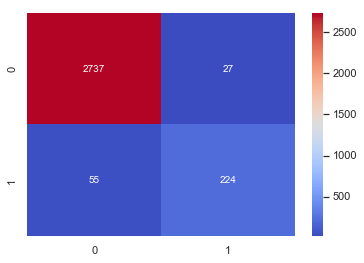

In [0]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train) 
KNN_y_pred = KNN_model.predict(X_val)

from sklearn.metrics import mean_squared_error
KNN_MSE = mean_squared_error(y_val, KNN_y_pred)  
print(KNN_MSE)

from sklearn.metrics import confusion_matrix
KNN_conf = confusion_matrix(y_val, KNN_y_pred)

sns.heatmap(KNN_conf,annot=True, fmt="d", cmap="coolwarm");

In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, KNN_y_pred)
accuracy

0.9730529083141637

In [0]:
from sklearn.metrics import precision_score
precision = precision_score(y_val, KNN_y_pred)
precision

0.8924302788844621

In [0]:
from sklearn.metrics import recall_score
recall = recall_score(y_val, KNN_y_pred)
recall

0.8028673835125448

In [0]:
from sklearn.metrics import f1_score
f1score = f1_score(y_val, KNN_y_pred)
f1score

0.8452830188679245

# Preprocesamiento de la Data

## Escalamiento de la data

In [0]:
#Escalamiento 
from sklearn.preprocessing import MinMaxScaler
head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
scaler = MinMaxScaler()
scaler.fit(data_pulsar)
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns =head)
data_pulsar_scaled.describe()

#Partición de la data escalada
X_sca = data_pulsar_scaled.drop(columns=["is_pulsar"])
y_sca = data_pulsar_scaled["is_pulsar"]

X_trainval_sca, X_test_sca, y_trainval_sca, y_test_sca = train_test_split(X_sca, y_sca, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train_sca, X_val_sca, y_train_sca, y_val_sca = train_test_split(X_trainval_sca, y_trainval_sca, test_size=0.2, random_state=0)


## Aplicación de SVMSMOTE

In [5]:
#Antes de aplicar SMOTE
y_train_sca.value_counts()

0.0    11020
1.0     1150
Name: is_pulsar, dtype: int64

In [0]:
#https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#r88acb9955f91-2
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
smt = SVMSMOTE(random_state=12)
X_sm_train, y_sm_train = smt.fit_resample(X_train_sca, y_train_sca)
#from imblearn.ensemble import BalancedBaggingClassifier # doctest: +NORMALIZE_WHITESPACE
#bbc = BalancedBaggingClassifier(random_state=0)
#X_sm_train, y_sm_train = smt.fit_resample(X_train, y_train)


In [38]:
print('Tamaño de la data remuestrada: %s' % Counter(y_sm_train))

Tamaño de la data remuestrada: Counter({0.0: 11020, 1.0: 11020})


In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

## SVC - DataRemuestrada

0.05718041406506737


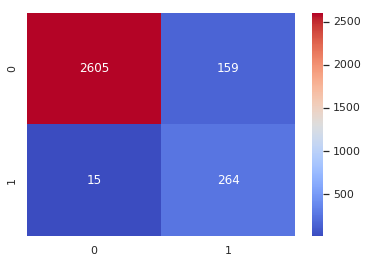

In [48]:
from sklearn.svm import SVC

SVM_sm_model = SVC(gamma='auto',kernel='rbf')
SVM_sm_model.fit(X_sm_train, y_sm_train) 
SVM_ysm_pred = SVM_sm_model.predict(X_val_sca)

from sklearn.metrics import mean_squared_error
SVM_sm_MSE = mean_squared_error(y_val_sca, SVM_ysm_pred)  
print(SVM_sm_MSE)

from sklearn.metrics import confusion_matrix
SVM_sm_conf = confusion_matrix(y_val_sca, SVM_ysm_pred)

sns.heatmap(SVM_sm_conf,annot=True, fmt="d", cmap="coolwarm");

In [49]:
accuracy = accuracy_score(y_val_sca, SVM_ysm_pred)  
precision = precision_score(y_val_sca, SVM_ysm_pred)
recall = recall_score(y_val_sca, SVM_ysm_pred)
f1score = f1_score(y_val_sca, SVM_ysm_pred)
print('La exactitud del modelo con aplicación de SVMSMOTE es: %s' % accuracy)
print('La precisión del modelo con aplicación de SVMSMOTE es: %s' % precision)
print('La exhaustividad(recall) del modelo con aplicación de SVMSMOTE es: %s' % recall)
print('El F1 score del modelo con aplicación de SVMSMOTE es: %s' % f1score)

La exactitud del modelo con aplicación de SVMSMOTE es: 0.9428195859349326
La precisión del modelo con aplicación de SVMSMOTE es: 0.624113475177305
La exhaustividad(recall) del modelo con aplicación de SVMSMOTE es: 0.946236559139785
El F1 score del modelo con aplicación de SVMSMOTE es: 0.7521367521367522


## KNN-Remuestreada

0.03812027604337825


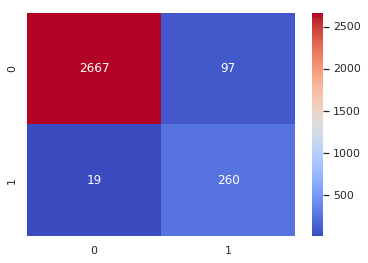

In [50]:
from sklearn.neighbors import KNeighborsClassifier

KNN_sm_model = KNeighborsClassifier(n_neighbors=5)
KNN_sm_model.fit(X_sm_train, y_sm_train) 
KNN_ysm_pred = KNN_sm_model.predict(X_val_sca)

from sklearn.metrics import mean_squared_error
KNN_sm_MSE = mean_squared_error(y_val_sca, KNN_ysm_pred)  
print(KNN_sm_MSE)

from sklearn.metrics import confusion_matrix
KNN_sm_conf = confusion_matrix(y_val_sca, KNN_ysm_pred)

sns.heatmap(KNN_sm_conf,annot=True, fmt="d", cmap="coolwarm");

In [51]:
accuracy = accuracy_score(y_val, KNN_ysm_pred)  
precision = precision_score(y_val, KNN_ysm_pred)
recall = recall_score(y_val, KNN_ysm_pred)
f1score = f1_score(y_val, KNN_ysm_pred)
print('La exactitud del modelo con aplicación de SVMSMOTE es: %s' % accuracy)
print('La precisión del modelo con aplicación de SVMSMOTE es: %s' % precision)
print('La exhaustividad(recall) del modelo con aplicación de SVMSMOTE es: %s' % recall)
print('El F1 score del modelo con aplicación de SVMSMOTE es: %s' % f1score)

La exactitud del modelo con aplicación de SVMSMOTE es: 0.9618797239566218
La precisión del modelo con aplicación de SVMSMOTE es: 0.7282913165266106
La exhaustividad(recall) del modelo con aplicación de SVMSMOTE es: 0.931899641577061
El F1 score del modelo con aplicación de SVMSMOTE es: 0.8176100628930817


## RF-Remuestreada

0.057837660203746304


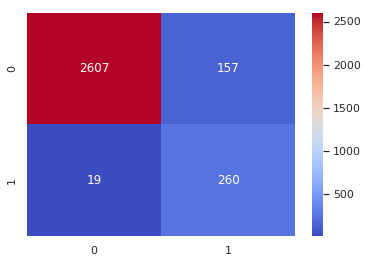

In [52]:
from sklearn.ensemble import RandomForestClassifier

RF_sm_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_sm_model.fit(X_sm_train, y_sm_train) 
RF_ysm_pred = RF_sm_model.predict(X_val_sca)

from sklearn.metrics import mean_squared_error
RF_sm_MSE =mean_squared_error(y_val_sca, RF_ysm_pred)  
print(RF_sm_MSE)

from sklearn.metrics import confusion_matrix
RF_sm_conf = confusion_matrix(y_val_sca, RF_ysm_pred)

sns.heatmap(RF_sm_conf,annot=True, fmt="d", cmap="coolwarm");

In [53]:
accuracy = accuracy_score(y_val, RF_ysm_pred)  
precision = precision_score(y_val, RF_ysm_pred)
recall = recall_score(y_val, RF_ysm_pred)
f1score = f1_score(y_val, RF_ysm_pred)
print('La exactitud del modelo con aplicación de SVMSMOTE es: %s' % accuracy)
print('La precisión del modelo con aplicación de SVMSMOTE es: %s' % precision)
print('La exhaustividad(recall) del modelo con aplicación de SVMSMOTE es: %s' % recall)
print('El F1 score del modelo con aplicación de SVMSMOTE es: %s' % f1score)

La exactitud del modelo con aplicación de SVMSMOTE es: 0.9421623397962537
La precisión del modelo con aplicación de SVMSMOTE es: 0.6235011990407674
La exhaustividad(recall) del modelo con aplicación de SVMSMOTE es: 0.931899641577061
El F1 score del modelo con aplicación de SVMSMOTE es: 0.7471264367816092


## NN Remuestreada

0.045021360499507064


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


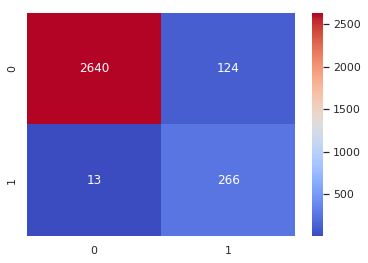

In [54]:
from sklearn.neural_network import MLPClassifier

NN_sm_model = MLPClassifier()
NN_sm_model.fit(X_sm_train, y_sm_train) 
NN_ysm_pred = NN_sm_model.predict(X_val_sca)

from sklearn.metrics import mean_squared_error
NN_sm_MSE =mean_squared_error(y_val_sca, NN_ysm_pred)  
print(NN_sm_MSE)

from sklearn.metrics import confusion_matrix
NN_sm_conf = confusion_matrix(y_val_sca, NN_ysm_pred)

sns.heatmap(NN_sm_conf,annot=True, fmt="d", cmap="coolwarm");

In [55]:
accuracy = accuracy_score(y_val, NN_ysm_pred)  
precision = precision_score(y_val, NN_ysm_pred)
recall = recall_score(y_val, NN_ysm_pred)
f1score = f1_score(y_val, NN_ysm_pred)
print('La exactitud del modelo con aplicación de SVMSMOTE es: %s' % accuracy)
print('La precisión del modelo con aplicación de SVMSMOTE es: %s' % precision)
print('La exhaustividad(recall) del modelo con aplicación de SVMSMOTE es: %s' % recall)
print('El F1 score del modelo con aplicación de SVMSMOTE es: %s' % f1score)

La exactitud del modelo con aplicación de SVMSMOTE es: 0.9549786395004929
La precisión del modelo con aplicación de SVMSMOTE es: 0.6820512820512821
La exhaustividad(recall) del modelo con aplicación de SVMSMOTE es: 0.953405017921147
El F1 score del modelo con aplicación de SVMSMOTE es: 0.7952167414050823
